In [15]:
import pandas as pd

ny_path = "/home/fuest/EnData/data/pecanstreet/15minute_data_newyork.csv"
austin_path = "/home/fuest/EnData/data/pecanstreet/15minute_data_austin.csv"
cali_path = "/home/fuest/EnData/data/pecanstreet/15minute_data_california.csv"

ny_data = pd.read_csv(ny_path)
austin_data = pd.read_csv(austin_path)
cali_data = pd.read_csv(cali_path)

ny_user_ids = ny_data.dataid.unique()
austin_user_ids = austin_data.dataid.unique()
cali_user_ids = cali_data.dataid.unique()
austin_user_ids

array([ 661, 1642, 2335, 2361, 2818, 3039, 3456, 3538, 4031, 4373, 4767,
       5746, 6139, 7536, 7719, 7800, 7901, 7951, 8156, 8386, 8565, 9019,
       9160, 9922, 9278])

<Axes: >

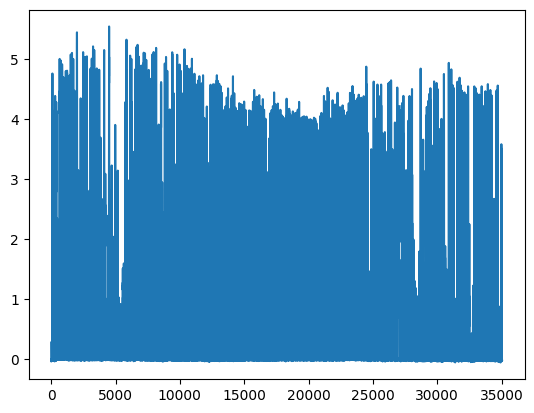

In [20]:
austin_data[austin_data["dataid"]==661].solar.plot()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from data_utils.dataset import PecanStreetDataset

def plot_grid_profile(df, month, weekday):
    # Filter the DataFrame based on the specified month and weekday
    filtered_df = df[(df['month'] == month) & (df['weekday'] == weekday)]
    
    # Check if there are any rows after filtering
    if filtered_df.empty:
        print(f"No data available for month {month} and weekday {weekday}.")
        return

    # Convert the 'grid' column to a list of arrays
    grid_values = filtered_df['grid'].apply(np.array).values

    # Calculate the average grid values for each 15-minute interval across all filtered rows
    averaged_grid = np.mean(np.vstack(grid_values), axis=0)

    # Generate 96 timestamps for a day at 15-minute intervals
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    # Ensure that the lengths match
    if len(averaged_grid) != len(timestamps):
        raise ValueError(f"Length of averaged_grid ({len(averaged_grid)}) does not match length of timestamps ({len(timestamps)}).")

    # Plot the averaged grid profile
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, averaged_grid, marker='o')
    plt.title(f'Grid Profile for Month {month} and Weekday {weekday}')
    plt.xlabel('Time of Day')
    plt.ylabel('Grid Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

df = PecanStreetDataset(normalize=False).data
plot_grid_profile(df, month=5, weekday=3)

No data available for month 11 and weekday 3 with dataid 27.
No data available for month 11 and weekday 3 with dataid 142.
No data available for month 11 and weekday 3 with dataid 387.
No data available for month 11 and weekday 3 with dataid 558.
No data available for month 11 and weekday 3 with dataid 914.
No data available for month 11 and weekday 3 with dataid 950.
No data available for month 11 and weekday 3 with dataid 1222.
No data available for month 11 and weekday 3 with dataid 1240.
No data available for month 11 and weekday 3 with dataid 1417.
No data available for month 11 and weekday 3 with dataid 2096.
No data available for month 11 and weekday 3 with dataid 2318.
No data available for month 11 and weekday 3 with dataid 2358.
No data available for month 11 and weekday 3 with dataid 3000.
No data available for month 11 and weekday 3 with dataid 3488.
No data available for month 11 and weekday 3 with dataid 3517.
No data available for month 11 and weekday 3 with dataid 3700.

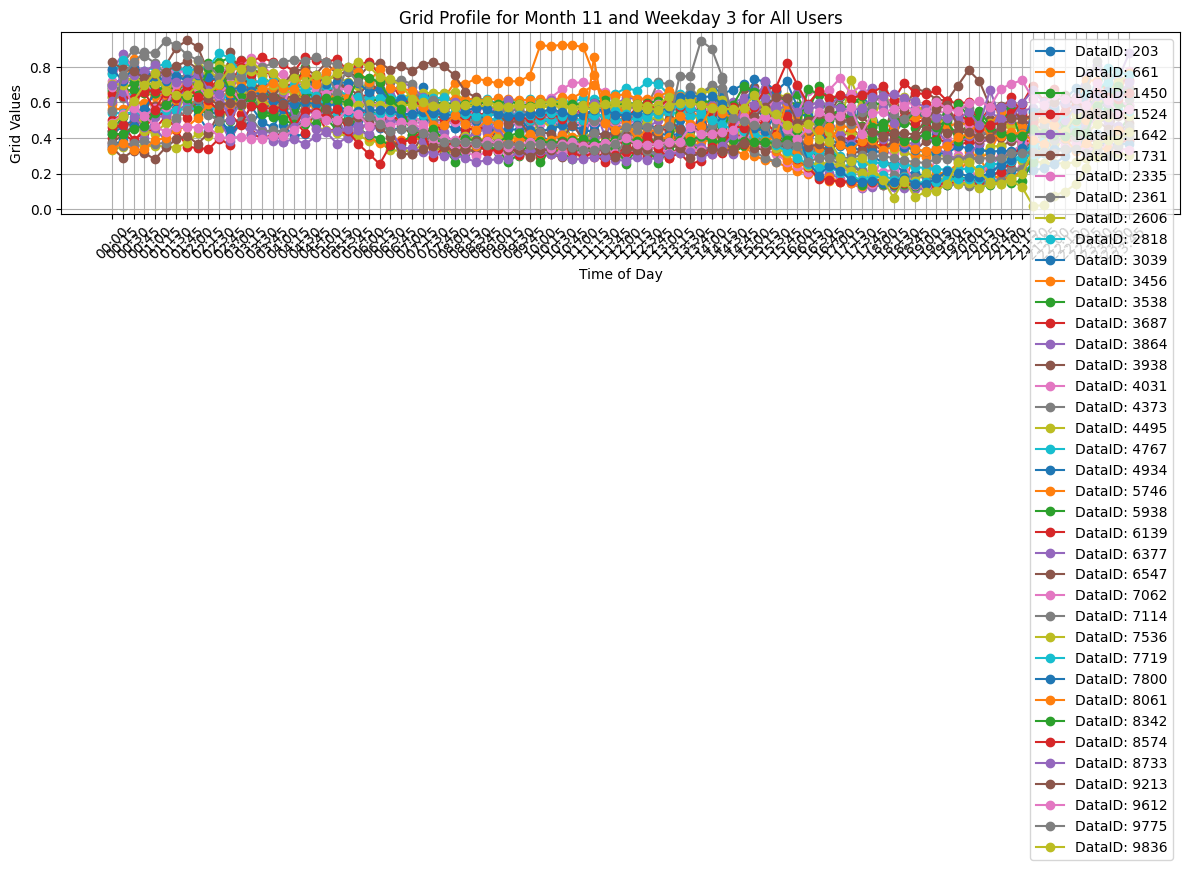

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from data_utils.dataset import PecanStreetDataset

def plot_grid_profile(df, month, weekday, dataid=None, ax=None):
    # Filter the DataFrame based on the specified month and weekday
    filtered_df = df[(df['month'] == month) & (df['weekday'] == weekday)]
    
    # Further filter by dataid if provided
    if dataid is not None:
        filtered_df = filtered_df[filtered_df['dataid'] == dataid]
    
    # Check if there are any rows after filtering
    if filtered_df.empty:
        print(f"No data available for month {month} and weekday {weekday} with dataid {dataid}.")
        return

    # Convert the 'grid' column to a list of arrays
    grid_values = filtered_df['grid'].apply(np.array).values

    # Calculate the average grid values for each 15-minute interval across all filtered rows
    averaged_grid = np.mean(np.vstack(grid_values), axis=0)

    # Generate 96 timestamps for a day at 15-minute intervals
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    # Ensure that the lengths match
    if len(averaged_grid) != len(timestamps):
        raise ValueError(f"Length of averaged_grid ({len(averaged_grid)}) does not match length of timestamps ({len(timestamps)}).")

    # Plot the averaged grid profile
    if ax is None:
        plt.figure(figsize=(12, 6))
        plt.plot(timestamps, averaged_grid, marker='o')
        title = f'Grid Profile for Month {month} and Weekday {weekday}'
        if dataid is not None:
            title += f' (DataID: {dataid})'
        plt.title(title)
        plt.xlabel('Time of Day')
        plt.ylabel('Grid Values')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        ax.plot(timestamps, averaged_grid, marker='o', label=f'DataID: {dataid}')

def plot_all_users_grid_profile(df, month, weekday):
    unique_dataids = df['dataid'].unique()
    fig, ax = plt.subplots(figsize=(12, 6))
    for dataid in unique_dataids:
        plot_grid_profile(df, month, weekday, dataid, ax=ax)
    
    title = f'Grid Profile for Month {month} and Weekday {weekday} for All Users'
    plt.title(title)
    plt.xlabel('Time of Day')
    plt.ylabel('Grid Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Load the dataset
df = PecanStreetDataset(normalize=True).data

# Plot for all users
plot_all_users_grid_profile(df, month=11, weekday=3)

In [ ]:
def plot_daily_usage_profiles(df, dataid, month, weekday):
    # Filter the DataFrame based on the specified user id, month, and weekday
    filtered_df = df[(df['dataid'] == dataid) & (df['month'] == month) & (df['weekday'] == weekday)]
    
    # Check if there are any rows after filtering
    if filtered_df.empty:
        print(f"No data available for user {dataid}, month {month}, and weekday {weekday}.")
        return

    grid_values = filtered_df['grid'].apply(np.array).values
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    plt.figure(figsize=(12, 6))
    for i, daily_grid in enumerate(grid_values):
        plt.plot(timestamps, daily_grid, marker='o', label=f'Day {i+1}')

    title = f'Daily Usage Profiles for User {dataid}, Month {month}, Weekday {weekday}'
    plt.title(title)
    plt.xlabel('Time of Day')
    plt.ylabel('Grid Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

df = PecanStreetDataset(normalize=False).data
plot_daily_usage_profiles(df, dataid=3687, month=5, weekday=0)

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from data_utils.dataset import PecanStreetDataset, prepare_dataloader, split_dataset
from generator.acgan import ACGAN  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = PecanStreetDataset(normalize=True, user_id=27)
train_dataset, val_dataset = split_dataset(data)
model = ACGAN(
    input_dim=1,
    noise_dim=512,
    embedding_dim=512,
    output_dim=96,
    learning_rate=1e-4,
    weight_path="runs/",
)
model.train(train_dataset, val_dataset, batch_size=32, num_epoch=100)


def generate_and_plot_series(model, day_labels, month_labels, data, month, weekday):
    series1 = model.generate([day_labels, month_labels]).squeeze()
    series2 = model.generate([day_labels, month_labels]).squeeze()
    series3 = model.generate([day_labels, month_labels]).squeeze()

    timestamps = pd.date_range(start='00:00', periods=96, freq='15T').strftime('%H:%M')

    filtered_data = data[(data['month'] == month) & (data['weekday'] == weekday)]
    real_profiles = filtered_data.sample(3)['grid'].values
    real_profile1 = np.array(real_profiles[0])
    real_profile2 = np.array(real_profiles[1])
    real_profile3 = np.array(real_profiles[2])

    # Plot all series on the same plot
    plt.figure(figsize=(15, 6))
    plt.plot(timestamps, series1, label='Generated Profile 1')
    plt.plot(timestamps, series2, label='Generated Profile 2')
    plt.plot(timestamps, series3, label='Generated Profile 3')
    plt.plot(timestamps, real_profile1, label='Real Profile 1', linestyle='--')
    plt.plot(timestamps, real_profile2, label='Real Profile 2', linestyle='--')
    plt.plot(timestamps, real_profile3, label='Real Profile 3', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Generated and Real Time Series Profiles')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

day_labels = torch.tensor([6]).to(device)
month_labels = torch.tensor([5]).to(device)

generate_and_plot_series(model, day_labels, month_labels, data.data, 5, 6)

In [ ]:
import numpy as np

day_labels = torch.tensor([6]).to(device)
month_labels = torch.tensor([9]).to(device)
generate_and_plot_series(model, day_labels, month_labels, data.data, 9, 6)

In [38]:
from eval.metrics import max_mean_discrepancy
from eval.loss import mmd_loss

day_labels = torch.tensor([6]).to(device)
month_labels = torch.tensor([9]).to(device)

fake = model.generate([day_labels, month_labels])
dataset = data.data
real = dataset.loc[(dataset["month"] == 9) & (dataset["weekday"] == 6)].copy()
real = np.expand_dims(np.array(real["grid"].iloc[0]), axis=1)
real.shape

(96, 1)

In [21]:
df = PecanStreetDataset(normalize=True, user_id=661)
df.is_pv_user

AttributeError: 'PecanStreetDataset' object has no attribute 'is_pv_user'